<a href="https://colab.research.google.com/github/MohammedShabry/DL-Assignment/blob/Dhananjaya-IT21185052/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

# Drop unnecessary columns
df = df.drop(columns=['customerID'])

# Convert 'TotalCharges' to numeric (errors='coerce' turns invalid parsing into NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values for 'TotalCharges' after conversion
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Convert categorical features into numeric using Label Encoding
le = LabelEncoder()

# List of categorical columns to encode
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Select input features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Normalize the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Preprocessing completed successfully!")




Preprocessing completed successfully!


<ipython-input-8-8e345b88325c>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [9]:
# Reshape data to 3D for CNN (samples, time steps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [10]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define CNN model
cnn_model = Sequential()

# Add Convolutional layer
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))

# Add Pooling layer
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten the output
cnn_model.add(Flatten())

# Add Dense layers
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dropout(0.5))

# Output layer
cnn_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Train the CNN model
cnn_history = cnn_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7037 - loss: 0.5760 - val_accuracy: 0.7862 - val_loss: 0.4362
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7626 - loss: 0.4676 - val_accuracy: 0.7924 - val_loss: 0.4373
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7769 - loss: 0.4596 - val_accuracy: 0.7870 - val_loss: 0.4319
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7839 - loss: 0.4860 - val_accuracy: 0.7950 - val_loss: 0.4264
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7886 - loss: 0.4477 - val_accuracy: 0.7870 - val_loss: 0.4254
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7851 - loss: 0.4557 - val_accuracy: 0.7968 - val_loss: 0.4241
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7804 - loss: 0.4426 - val_accuracy: 0.8039 - val_loss: 0.4180
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8042 - loss: 0.4395 - val_accu

In [ ]:
# Evaluate the model on test data
cnn_score = cnn_model.evaluate(X_test_reshaped, y_test)

# Print the test accuracy and loss
print(f'Test Loss: {cnn_score[0]}')
print(f'Test Accuracy: {cnn_score[1]}')


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7865 - loss: 0.6432
Test Loss: 0.6299206614494324
Test Accuracy: 0.7913413643836975


In [ ]:
# Make predictions on test data
cnn_preds = cnn_model.predict(X_test_reshaped)

# Binarize predictions (Threshold of 0.5)
cnn_preds = (cnn_preds > 0.5).astype(int)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
from sklearn.metrics import classification_report

# Classification report
print(classification_report(y_test, cnn_preds))


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.51      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



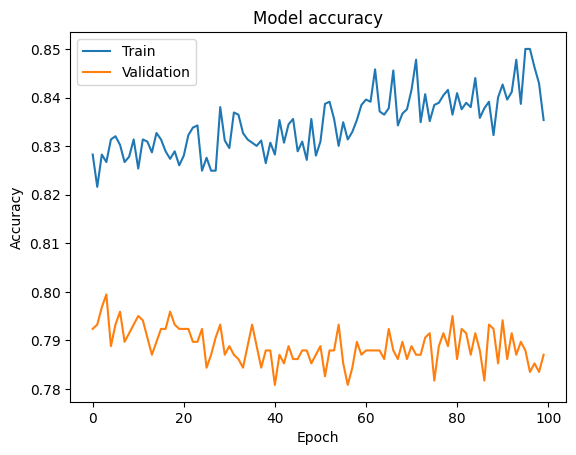

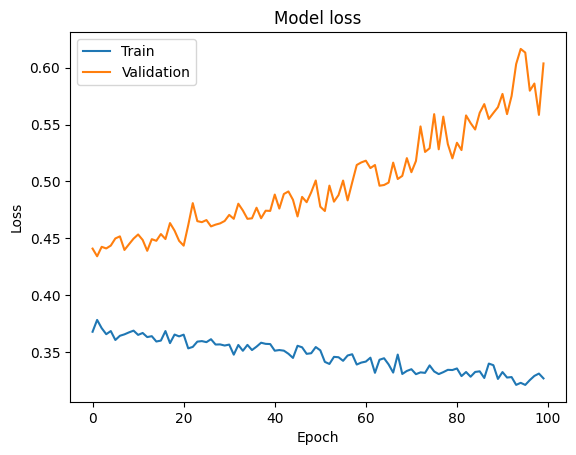

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
